In [5]:
import networkx as nx
%matplotlib inline

In [2]:
G = nx.path_graph(3)

In [3]:
G

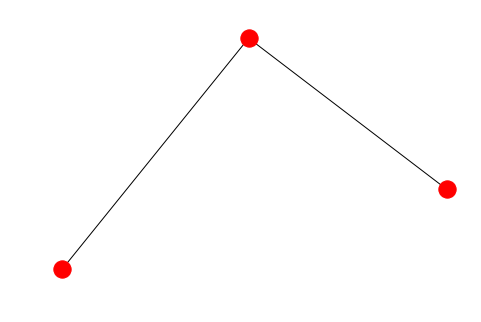

In [6]:
nx.draw(G)

In [7]:
bb = nx.betweenness_centrality(G)

In [8]:
bb

{0: 0.0, 1: 1.0, 2: 0.0}

In [9]:
bb[0]

0.0

In [14]:
type(list(bb.keys())[0])

int

In [26]:
N = 14

In [27]:
g = nx.barabasi_albert_graph(n=N, m=3)

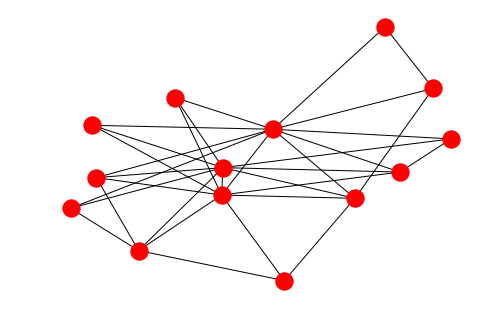

In [19]:
nx.draw(g)

In [20]:
from random import random

In [23]:
random()

0.671093912273386

In [24]:
POPULATION_P = 0.7

In [37]:
def sample_pop(node):
    if random() < POPULATION_P:
        return 0
    return 1

In [38]:
node_to_pop = {i: sample_pop(g.node[i]) for i in range(N)}

In [39]:
node_to_pop

{0: 1,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 0,
 7: 1,
 8: 0,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0}

In [40]:
nx.set_node_attributes(G=g, name='population', values=node_to_pop)

In [41]:
g.node[8]

{'population': 0}

In [43]:
for node in g.nodes(data=True):
    print(node)

(0, {'population': 1})
(1, {'population': 0})
(2, {'population': 0})
(3, {'population': 0})
(4, {'population': 1})
(5, {'population': 1})
(6, {'population': 0})
(7, {'population': 1})
(8, {'population': 0})
(9, {'population': 1})
(10, {'population': 0})
(11, {'population': 0})
(12, {'population': 0})
(13, {'population': 0})


In [42]:
pop_to_shape = {0: 'o', 1: 'v'}

In [44]:
from strct.dicts import reverse_dict

In [65]:
from matplotlib import pyplot as plt

In [66]:
import pylab

In [69]:
def draw_population_graph(G, pop_to_shape):
    plt.figure(3,figsize=(12,12)) 
    # First obtain the node positions using one of the layouts
    node_pos = nx.layout.spring_layout(G)
    # The rest of the code here attempts to automate the whole process by
    # first determining how many different node classes (according to
    # attribute 's') exist in the node set and then repeatedly calling 
    # draw_networkx_node for each. Perhaps this part can be optimised further.
    # ---
    #For each node shape...
    shape_to_pop = reverse_dict(pop_to_shape)
    for shape in shape_to_pop.keys():
        # ...filter and draw the subset of nodes with the same symbol
        # in the positions that are now known through the use of the layout.
        pop = shape_to_pop[shape][0]
        nodelist = [node[0] for node in filter(lambda x: x[1]['population']==pop, G.nodes(data=True))]
#         print(shape)
#         print(pop)
#         print(nodelist)
        nodes = nx.draw_networkx_nodes(
            G=G,
            pos=node_pos,
            node_shape=shape,
            nodelist=nodelist,
        )
        nodes.set_edgecolor('b')
    #Finally, draw the edges between the nodes
    nx.draw_networkx_edges(G, node_pos)
    #And show the final result
    pylab.show()

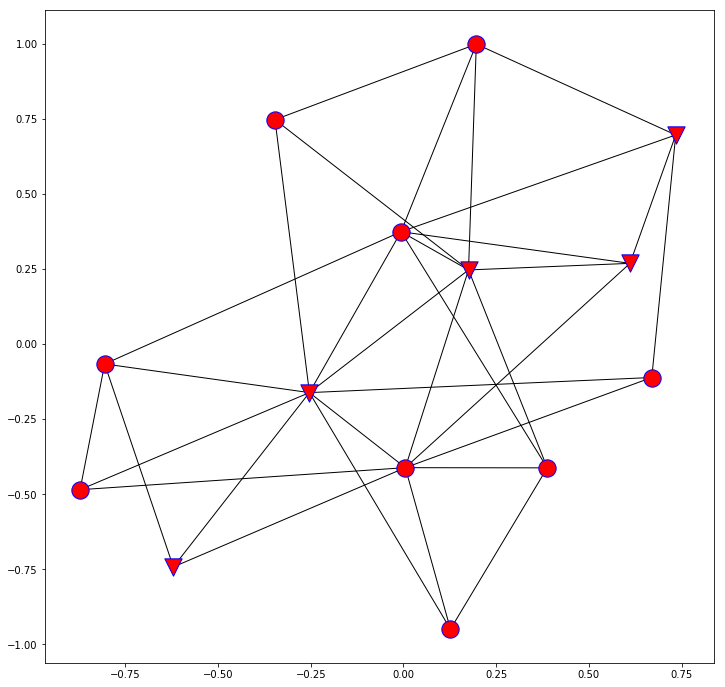

In [70]:
draw_population_graph(g, pop_to_shape)